In [1]:
import pickle as pkl
import pandas as pd

with open('../data_raw/dictionary.pkl', 'rb') as fw_d,\
    open('../data_raw/data_train.pkl', 'rb') as fw_train,\
    open('../data_raw/data_test.pkl', 'rb') as fw_test:
    dictionary_ = pkl.load(fw_d)
    article_dict = dictionary_['article']
    word_seg_dict = dictionary_['word_seg']
    train_data = pkl.load(fw_train)
    test_data = pkl.load(fw_test)

In [2]:
train_data.head()

,article,word_seg,class,article_len,word_seg_len
0,"[2, 373, 34, 26, 1, 244, 169, 3, 208, 449, 383...","[2, 2057, 1, 8019, 3, 2008, 502, 22, 1, 163, 3...",14,1047,627
1,"[13, 99, 2, 381, 295, 711, 545, 2, 819, 597, 1...","[2908, 2, 38268, 2, 158436, 2, 80259, 10342, 2...",3,4785,3062
2,"[2, 353, 677, 309, 3, 44, 35, 878, 1078, 5, 57...","[2, 550, 452, 3, 15453, 290, 167, 21, 11272, 3...",12,2407,1588
3,"[141, 23, 141, 106, 42, 77, 1398, 2197, 8, 225...","[261, 5995, 168, 19357, 5943, 3, 850, 12, 4145...",13,812,467
4,"[2, 2, 2, 1497, 2, 2797, 307, 660, 966, 30, 43...","[2, 2, 2, 811, 2, 10790, 23136, 10, 20699, 11,...",12,1974,1297


In [3]:
test_data.head()

,article,word_seg,article_len,word_seg_len
0,"[2, 509, 9, 84, 418, 454, 623, 239, 152, 626, ...","[2, 650, 95, 162, 591, 1690, 1143, 1, 175, 7, ...",771,478
1,"[482, 93, 1, 39, 43, 347, 376, 294, 308, 1, 20...","[957, 1, 199, 3794, 1629, 1, 11620, 11004, 362...",578,350
2,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 524, 859, 16...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1372, 18080,...",86,59
3,"[1281, 1128, 3, 195, 375, 182, 315, 487, 376, ...","[85697, 3, 11755, 2429, 39357, 1, 1930, 90, 11...",879,528
4,"[84, 373, 10, 188, 1320, 1, 270, 68, 25, 99, 5...","[679, 370, 2350, 1, 376, 966, 472, 16, 1355, 1...",2515,1603


# 统计各单词数量

In [4]:
from collections import Counter

article_counter = Counter()
word_seg_counter = Counter()

train_data.article.apply(lambda x: article_counter.update(x))
train_data.word_seg.apply(lambda x: word_seg_counter.update(x))

train_data.head()

,article,word_seg,class,article_len,word_seg_len
0,"[2, 373, 34, 26, 1, 244, 169, 3, 208, 449, 383...","[2, 2057, 1, 8019, 3, 2008, 502, 22, 1, 163, 3...",14,1047,627
1,"[13, 99, 2, 381, 295, 711, 545, 2, 819, 597, 1...","[2908, 2, 38268, 2, 158436, 2, 80259, 10342, 2...",3,4785,3062
2,"[2, 353, 677, 309, 3, 44, 35, 878, 1078, 5, 57...","[2, 550, 452, 3, 15453, 290, 167, 21, 11272, 3...",12,2407,1588
3,"[141, 23, 141, 106, 42, 77, 1398, 2197, 8, 225...","[261, 5995, 168, 19357, 5943, 3, 850, 12, 4145...",13,812,467
4,"[2, 2, 2, 1497, 2, 2797, 307, 660, 966, 30, 43...","[2, 2, 2, 811, 2, 10790, 23136, 10, 20699, 11,...",12,1974,1297


In [5]:
article_number = [i for i in zip(*article_counter.items())]
word_seg_number = [i for i in zip(*word_seg_counter.items())]
print(article_number, word_seg_number)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



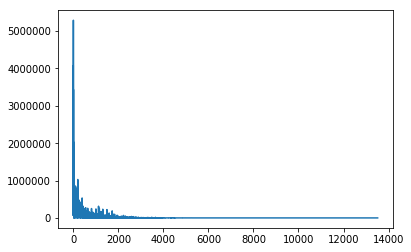

In [8]:

import matplotlib.pyplot as plt

plt.plot(article_number[1])
plt.show()

In [9]:
def tra_str(li):
    return ' '.join(map(str, li))

train_data.article = train_data.article.apply(tra_str)
train_data.word_seg = train_data.word_seg.apply(tra_str)
train_data.head()

,article,word_seg,class,article_len,word_seg_len
0,2 373 34 26 1 244 169 3 208 449 383 26 383 28 ...,2 2057 1 8019 3 2008 502 22 1 163 3848 356 14 ...,14,1047,627
1,13 99 2 381 295 711 545 2 819 597 1041 711 2 2...,2908 2 38268 2 158436 2 80259 10342 2115 19870...,3,4785,3062
2,2 353 677 309 3 44 35 878 1078 5 57 639 91 943...,2 550 452 3 15453 290 167 21 11272 389 1 1020 ...,12,2407,1588
3,141 23 141 106 42 77 1398 2197 8 225 3 109 129...,261 5995 168 19357 5943 3 850 12 4145 1002 16 ...,13,812,467
4,2 2 2 1497 2 2797 307 660 966 30 437 729 32 3 ...,2 2 2 811 2 10790 23136 10 20699 11 3 24038 1 ...,12,1974,1297


In [10]:
train_data.head()

,article,word_seg,class,article_len,word_seg_len
0,2 373 34 26 1 244 169 3 208 449 383 26 383 28 ...,2 2057 1 8019 3 2008 502 22 1 163 3848 356 14 ...,14,1047,627
1,13 99 2 381 295 711 545 2 819 597 1041 711 2 2...,2908 2 38268 2 158436 2 80259 10342 2115 19870...,3,4785,3062
2,2 353 677 309 3 44 35 878 1078 5 57 639 91 943...,2 550 452 3 15453 290 167 21 11272 389 1 1020 ...,12,2407,1588
3,141 23 141 106 42 77 1398 2197 8 225 3 109 129...,261 5995 168 19357 5943 3 850 12 4145 1002 16 ...,13,812,467
4,2 2 2 1497 2 2797 307 660 966 30 437 729 32 3 ...,2 2 2 811 2 10790 23136 10 20699 11 3 24038 1 ...,12,1974,1297


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

article_vector = TfidfVectorizer(ngram_range=(1,2),use_idf=1,smooth_idf=1, sublinear_tf=1)
article_vector.fit(train_data.article)

word_seg_vector = TfidfVectorizer(ngram_range=(1,2),use_idf=1,smooth_idf=1, sublinear_tf=1)
word_seg_vector.fit(train_data.word_seg)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents=None, sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=1,
        vocabulary=None)

In [13]:
print(article_vector.vocabulary)
print(word_seg_vector.vocabulary)

None
None


In [14]:
import pickle as pkl
with open('vector.pkl', 'wb') as fw:
    pkl.dump([article_vector, word_seg_vector], fw)

In [19]:
print(article_vector._tfidf._idf_diag)

  (0, 0)	1.1086162100089183
  (1, 1)	5.824926765596472
  (2, 2)	5.488802597200145
  (3, 3)	7.485593867799364
  (4, 4)	8.475006864502483
  (5, 5)	9.069713972249174
  (6, 6)	6.736357220588375
  (7, 7)	8.046813505316761
  (8, 8)	7.5050119536564655
  (9, 9)	11.842302694488955
  (10, 10)	7.10610424609446
  (11, 11)	8.15342324037502
  (12, 12)	6.730314906132412
  (13, 13)	7.699167968097423
  (14, 14)	5.563781270323111
  (15, 15)	7.781859683942536
  (16, 16)	8.603624242324575
  (17, 17)	7.479204069700592
  (18, 18)	8.116609267252302
  (19, 19)	4.370939606301858
  (20, 20)	9.101462670563754
  (21, 21)	8.315942169872795
  (22, 22)	11.842302694488955
  (23, 23)	10.9260119626148
  (24, 24)	8.286954632999542
  :	:
  (3393316, 3393316)	11.436837586380792
  (3393317, 3393317)	11.842302694488955
  (3393318, 3393318)	11.842302694488955
  (3393319, 3393319)	11.842302694488955
  (3393320, 3393320)	11.842302694488955
  (3393321, 3393321)	11.842302694488955
  (3393322, 3393322)	11.842302694488955
  (33933

In [20]:
print(article_number[1][:300])

(4063036, 71480, 407353, 436224, 5290340, 104070, 145398, 3437550, 119234, 59879, 68668, 431236, 327290, 276877, 115561, 67284, 1249736, 181425, 344103, 950408, 479, 320, 2025883, 497632, 102720, 84971, 152274, 37148, 125533, 1179852, 308730, 553471, 526307, 79272, 91103, 911, 59228, 46950, 52024, 232767, 228782, 27502, 82671, 1961, 16182, 160909, 192445, 113642, 52696, 256122, 106987, 239567, 140465, 85692, 818752, 165858, 107558, 139223, 81063, 38716, 2901, 8167, 44920, 60328, 55286, 17390, 101325, 181199, 36277, 63557, 32154, 93812, 231, 302193, 51143, 5308, 49519, 342857, 354424, 14289, 76553, 185078, 191186, 268911, 214226, 32964, 56999, 27887, 201845, 13065, 119726, 188132, 448752, 49510, 91403, 34815, 853835, 68504, 616991, 168759, 266628, 119097, 21226, 327565, 253411, 25780, 195644, 33726, 154264, 421777, 12420, 22745, 419420, 69332, 1532, 180594, 157534, 145256, 182847, 89339, 798884, 134894, 29929, 41126, 124913, 125408, 29152, 94443, 418690, 76875, 107209, 84087, 150626, 65

In [29]:

article_number = [i for i in zip(*article_counter.most_common())]
word_seg_number = [i for i in zip(*word_seg_counter.most_common())]


(5290340, 4063036, 3437550, 2025883, 1249736, 1179852, 1028550, 950408, 853835, 847268, 818752, 798884, 650586, 616991, 583008, 553471, 533532, 527138, 526307, 497632, 474725, 469568, 452268, 450837, 448752, 436224, 431236, 430919, 426536, 421777, 419420, 418690, 407353, 406923, 401873, 401535, 394918, 367641, 354424, 345637, 344103, 342857, 333060, 329550, 327565, 327290, 320968, 315897, 313449, 312886, 308844, 308730, 307089, 302193, 299712, 295653, 285366, 279802, 276877, 274800, 272779, 272505, 270800, 268911, 266628, 257468, 257396, 256122, 253411, 253275, 252845, 251124, 250695, 242638, 241954, 240516, 240050, 239567, 233511, 232767, 232663, 228782, 226471, 222871, 222188, 221398, 217837, 216187, 214361, 214226, 211842, 204070, 201845, 196775, 195644, 194416, 193728, 193540, 192445, 192056, 191186, 191138, 190979, 189966, 189734, 189563, 188132, 187965, 186358, 185078, 185033, 184976, 184333, 183864, 183386, 182847, 182699, 182639, 182004, 181425, 181199, 180594, 180127, 179900, 

In [30]:
print(article_number[1])

(5290340, 4063036, 3437550, 2025883, 1249736, 1179852, 1028550, 950408, 853835, 847268, 818752, 798884, 650586, 616991, 583008, 553471, 533532, 527138, 526307, 497632, 474725, 469568, 452268, 450837, 448752, 436224, 431236, 430919, 426536, 421777, 419420, 418690, 407353, 406923, 401873, 401535, 394918, 367641, 354424, 345637, 344103, 342857, 333060, 329550, 327565, 327290, 320968, 315897, 313449, 312886, 308844, 308730, 307089, 302193, 299712, 295653, 285366, 279802, 276877, 274800, 272779, 272505, 270800, 268911, 266628, 257468, 257396, 256122, 253411, 253275, 252845, 251124, 250695, 242638, 241954, 240516, 240050, 239567, 233511, 232767, 232663, 228782, 226471, 222871, 222188, 221398, 217837, 216187, 214361, 214226, 211842, 204070, 201845, 196775, 195644, 194416, 193728, 193540, 192445, 192056, 191186, 191138, 190979, 189966, 189734, 189563, 188132, 187965, 186358, 185078, 185033, 184976, 184333, 183864, 183386, 182847, 182699, 182639, 182004, 181425, 181199, 180594, 180127, 179900, 

In [32]:

test_data.article.apply(lambda x: article_counter.update(x))
test_data.word_seg.apply(lambda x: word_seg_counter.update(x))

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
102247    None
102248    None
102249    None
102250    None
102251    None
102252    None
102253    None
102254    None
102255    None
102256    None
102257    None
102258    None
102259    None
102260    None
102261    None
102262    None
102263    None
102264    None
102265    None
102266    None
102267    None
102268    None
102269    None
102270    None
102271    None
102272    None
102273    None
102274    None
102275    None
102276    None
Name: word_seg, Length: 102277, dtype: object

In [33]:
article_number = [i for i in zip(*article_counter.most_common())]
word_seg_number = [i for i in zip(*word_seg_counter.most_common())]

In [35]:
print(article_number[1])

(10592277, 8097463, 6893196, 4062176, 2511640, 2367030, 2058653, 1906702, 1715093, 1693503, 1643604, 1602522, 1292975, 1227377, 1166208, 1111335, 1064547, 1056982, 1054968, 999809, 950548, 941244, 903976, 901151, 892499, 878439, 866032, 863186, 854911, 844218, 839601, 839522, 813279, 812944, 812110, 806899, 792783, 735727, 713607, 694271, 688248, 685945, 666922, 661058, 655203, 642199, 638979, 630872, 626261, 623748, 620926, 618205, 617641, 608362, 602096, 592722, 571496, 558620, 552726, 552118, 547767, 546554, 544501, 535276, 531880, 517269, 516531, 510287, 508627, 507948, 505817, 503945, 503227, 486562, 484572, 479554, 479098, 476830, 470616, 461349, 457080, 453735, 445048, 444457, 443478, 441484, 437349, 434883, 431084, 427394, 423689, 411194, 404629, 393703, 393322, 391109, 388952, 386522, 384277, 383998, 383557, 382729, 381826, 381446, 379652, 379040, 377463, 373944, 372563, 370200, 368974, 368482, 368254, 366507, 365974, 365674, 365613, 364803, 363966, 362481, 362123, 361869, 361

In [51]:
print(word_seg_number[1][600000:700000])

(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [43]:
print(len(word_seg_number[1]))

1271460


In [54]:
def save_word(li):
    if isinstance(li, list) is False:
        li = li.split(' ')
    return [int(word) for word in li if 5 < word_seg_counter[int(word)] < 400000]

def save_article(li):
    if isinstance(li, list) is False:
        li = li.split(' ')
    return [int(word) for word in li if 50 < article_counter[int(word)] < 700000]

In [55]:
train_data.article = train_data.article.apply(save_article)
train_data.word_seg = train_data.word_seg.apply(save_word)
train_data.head()

,article,word_seg,class,article_len,word_seg_len
0,"[373, 244, 169, 208, 449, 383, 383, 45, 59, 22...","[2057, 8019, 2008, 502, 22, 163, 3848, 356, 15...",14,1047,627
1,"[99, 381, 295, 711, 545, 819, 597, 1041, 711, ...","[2908, 38268, 158436, 80259, 10342, 2115, 1987...",3,4785,3062
2,"[353, 677, 309, 44, 878, 1078, 57, 639, 91, 94...","[550, 452, 15453, 290, 167, 11272, 389, 1020, ...",12,2407,1588
3,"[141, 141, 106, 42, 77, 1398, 2197, 225, 109, ...","[261, 5995, 168, 19357, 5943, 850, 4145, 1002,...",13,812,467
4,"[1497, 2797, 307, 660, 966, 437, 729, 3289, 69...","[811, 10790, 23136, 20699, 24038, 30814, 31150...",12,1974,1297


In [56]:
test_data.article = test_data.article.apply(save_article)
test_data.word_seg = test_data.word_seg.apply(save_word)
test_data.head()

,article,word_seg,article_len,word_seg_len
0,"[509, 84, 418, 454, 623, 239, 152, 626, 640, 1...","[650, 95, 162, 591, 1690, 1143, 175, 598, 1405...",771,478
1,"[482, 93, 43, 347, 376, 294, 308, 208, 557, 84...","[957, 199, 3794, 1629, 11620, 11004, 3624, 30,...",578,350
2,"[524, 859, 163, 2138, 91, 391, 1031, 111, 392,...","[1372, 18080, 114076, 336, 617, 1702, 606, 739...",86,59
3,"[1281, 1128, 195, 375, 182, 315, 487, 376, 166...","[85697, 11755, 2429, 39357, 1930, 90, 110, 39,...",879,528
4,"[84, 373, 188, 1320, 270, 68, 99, 58, 60, 563,...","[679, 370, 2350, 376, 966, 472, 1355, 103, 574...",2515,1603


In [57]:
train_data['article_len'] = train_data['article'].apply(lambda x: len(x))
train_data['word_seg_len'] = train_data['word_seg'].apply(lambda x: len(x))

test_data['article_len'] = test_data['article'].apply(lambda x: len(x))
test_data['word_seg_len'] = test_data['word_seg'].apply(lambda x: len(x))

In [58]:
train_data['article_len'].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .98])

count    102277.000000
mean        834.056679
std         981.576281
min           5.000000
25%         347.000000
50%         591.000000
75%         995.000000
80%        1144.000000
85%        1346.000000
90%        1663.000000
95%        2279.200000
98%        3369.000000
max       42045.000000
Name: article_len, dtype: float64

In [59]:
train_data['word_seg_len'].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .98])

count    102277.000000
mean        494.872454
std         562.268824
min           2.000000
25%         209.000000
50%         355.000000
75%         593.000000
80%         682.000000
85%         801.000000
90%         987.000000
95%        1347.000000
98%        1980.000000
max       22762.000000
Name: word_seg_len, dtype: float64

In [60]:
test_data['article_len'].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .98])

count    102277.000000
mean        833.853486
std         955.330816
min           4.000000
25%         348.000000
50%         591.000000
75%         997.000000
80%        1142.000000
85%        1350.000000
90%        1662.000000
95%        2282.000000
98%        3345.960000
max       24127.000000
Name: article_len, dtype: float64

In [61]:
test_data['word_seg_len'].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .98])

count    102277.000000
mean        495.585919
std         556.406823
min           1.000000
25%         209.000000
50%         356.000000
75%         594.000000
80%         681.000000
85%         803.000000
90%         990.000000
95%        1349.000000
98%        1963.960000
max       16568.000000
Name: word_seg_len, dtype: float64

In [62]:
train_data.head()

,article,word_seg,class,article_len,word_seg_len
0,"[373, 244, 169, 208, 449, 383, 383, 45, 59, 22...","[2057, 8019, 2008, 502, 22, 163, 3848, 356, 15...",14,778,460
1,"[99, 381, 295, 711, 545, 819, 597, 1041, 711, ...","[2908, 38268, 158436, 80259, 10342, 2115, 1987...",3,3300,2090
2,"[353, 677, 309, 44, 878, 1078, 57, 639, 91, 94...","[550, 452, 15453, 290, 167, 11272, 389, 1020, ...",12,1580,1040
3,"[141, 141, 106, 42, 77, 1398, 2197, 225, 109, ...","[261, 5995, 168, 19357, 5943, 850, 4145, 1002,...",13,561,327
4,"[1497, 2797, 307, 660, 966, 437, 729, 3289, 69...","[811, 10790, 23136, 20699, 24038, 30814, 31150...",12,1322,866


In [63]:
train_data['full_article'] = train_data.article.apply(tra_str)
train_data['full_word_seg'] = train_data.word_seg.apply(tra_str)

In [64]:
test_data['full_article'] = test_data.article.apply(tra_str)
test_data['full_word_seg'] = test_data.word_seg.apply(tra_str)

In [65]:
train_data.head()

,article,word_seg,class,article_len,word_seg_len,full_article,full_word_seg
0,"[373, 244, 169, 208, 449, 383, 383, 45, 59, 22...","[2057, 8019, 2008, 502, 22, 163, 3848, 356, 15...",14,778,460,373 244 169 208 449 383 383 45 59 220 394 121 ...,2057 8019 2008 502 22 163 3848 356 15797 5636 ...
1,"[99, 381, 295, 711, 545, 819, 597, 1041, 711, ...","[2908, 38268, 158436, 80259, 10342, 2115, 1987...",3,3300,2090,99 381 295 711 545 819 597 1041 711 262 2389 1...,2908 38268 158436 80259 10342 2115 19870 804 5...
2,"[353, 677, 309, 44, 878, 1078, 57, 639, 91, 94...","[550, 452, 15453, 290, 167, 11272, 389, 1020, ...",12,1580,1040,353 677 309 44 878 1078 57 639 91 943 429 350 ...,550 452 15453 290 167 11272 389 1020 257 264 1...
3,"[141, 141, 106, 42, 77, 1398, 2197, 225, 109, ...","[261, 5995, 168, 19357, 5943, 850, 4145, 1002,...",13,561,327,141 141 106 42 77 1398 2197 225 109 1293 569 1...,261 5995 168 19357 5943 850 4145 1002 8117 316...
4,"[1497, 2797, 307, 660, 966, 437, 729, 3289, 69...","[811, 10790, 23136, 20699, 24038, 30814, 31150...",12,1322,866,1497 2797 307 660 966 437 729 3289 690 158 42 ...,811 10790 23136 20699 24038 30814 31150 49765 ...


In [66]:
test_data.head()

,article,word_seg,article_len,word_seg_len,full_article,full_word_seg
0,"[509, 84, 418, 454, 623, 239, 152, 626, 640, 1...","[650, 95, 162, 591, 1690, 1143, 175, 598, 1405...",563,341,509 84 418 454 623 239 152 626 640 152 208 152...,650 95 162 591 1690 1143 175 598 14051 175 227...
1,"[482, 93, 43, 347, 376, 294, 308, 208, 557, 84...","[957, 199, 3794, 1629, 11620, 11004, 3624, 30,...",402,244,482 93 43 347 376 294 308 208 557 84 197 569 5...,957 199 3794 1629 11620 11004 3624 30 720 3423...
2,"[524, 859, 163, 2138, 91, 391, 1031, 111, 392,...","[1372, 18080, 114076, 336, 617, 1702, 606, 739...",53,32,524 859 163 2138 91 391 1031 111 392 100 44 25...,1372 18080 114076 336 617 1702 606 7395 16176 ...
3,"[1281, 1128, 195, 375, 182, 315, 487, 376, 166...","[85697, 11755, 2429, 39357, 1930, 90, 110, 39,...",640,360,1281 1128 195 375 182 315 487 376 1662 88 1128...,85697 11755 2429 39357 1930 90 110 39 902 8500...
4,"[84, 373, 188, 1320, 270, 68, 99, 58, 60, 563,...","[679, 370, 2350, 376, 966, 472, 1355, 103, 574...",1648,1041,84 373 188 1320 270 68 99 58 60 563 56 655 512...,679 370 2350 376 966 472 1355 103 574 680 503 ...


In [67]:
with open('data_drop.pkl', 'wb') as fw:
    pkl.dump([train_data, test_data], fw)